In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as s
import scipy.stats as ss

In [27]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\autos.csv",encoding = "unicode_escape")

In [28]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

In [30]:
df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,3.715280e+05,371528.000000,371528.000000,371528.000000,371528.000000,371528.0,371528.00000
mean,1.729514e+04,2004.577997,115.549477,125618.688228,5.734445,0.0,50820.66764
std,3.587954e+06,92.866598,192.139578,40112.337051,3.712412,0.0,25799.08247
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.00000
25%,1.150000e+03,1999.000000,70.000000,125000.000000,3.000000,0.0,30459.00000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,0.0,49610.00000
75%,7.200000e+03,2008.000000,150.000000,150000.000000,9.000000,0.0,71546.00000
max,2.147484e+09,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.00000


## Analysis 1

### 1. Perform general Data analysis

#### Duplicates

In [31]:
df.duplicated().sum()

4

In [32]:
df.drop_duplicates(inplace = True)

#### Structural Errors

In [33]:
yr = df[(df['yearOfRegistration'] < 1900) | (df['yearOfRegistration'] >2023)]

df.drop(yr.index, inplace = True)

df['powerPS'] = np.where((df['powerPS'] < 1) | (df['powerPS'] >2400), df['powerPS'].median(), df['powerPS'] )

df['monthOfRegistration'] = np.where((df['monthOfRegistration'] == 0), df['monthOfRegistration'].mode()[0], df['monthOfRegistration'] )

df.drop(df[(df['price']==0) | (df['price']>4000000) | (df['price']< 500)].index, inplace = True)

#### Missing values

In [34]:
df.isna().sum()

dateCrawled                0
name                       0
seller                     0
offerType                  0
price                      0
abtest                     0
vehicleType            27358
yearOfRegistration         0
gearbox                13645
powerPS                    0
model                  15404
kilometer                  0
monthOfRegistration        0
fuelType               23725
brand                      0
notRepairedDamage      55391
dateCreated                0
nrOfPictures               0
postalCode                 0
lastSeen                   0
dtype: int64

In [35]:
df = df.drop(['notRepairedDamage','nrOfPictures'],axis = 1)
df['gearbox'].fillna(df['gearbox'].mode()[0],inplace = True)
df['fuelType'].fillna(df['fuelType'].mode()[0],inplace = True)
df['vehicleType'].fillna(df['vehicleType'].mode()[0],inplace = True)
df.dropna(inplace = True)

In [36]:
df.isna().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
model                  0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

#### Type casting

In [37]:
df.dtypes

dateCrawled             object
name                    object
seller                  object
offerType               object
price                    int64
abtest                  object
vehicleType             object
yearOfRegistration       int64
gearbox                 object
powerPS                float64
model                   object
kilometer                int64
monthOfRegistration      int64
fuelType                object
brand                   object
dateCreated             object
postalCode               int64
lastSeen                object
dtype: object

In [38]:
df['dateCrawled'] = pd.to_datetime(df['dateCrawled'])
df['dateCreated'] = pd.to_datetime(df['dateCreated'])
df['lastSeen'] = pd.to_datetime(df['lastSeen'])
df['kilometer'] = df['kilometer'].astype('int32')
df['yearOfRegistration'] = df['yearOfRegistration'].astype('int16')
df['powerPS'] = df['powerPS'].astype('int32')
df['monthOfRegistration'] = df['monthOfRegistration'].astype('int8')
df['postalCode'] = df['postalCode'].astype('int8')

In [39]:
df.dtypes

dateCrawled            datetime64[ns]
name                           object
seller                         object
offerType                      object
price                           int64
abtest                         object
vehicleType                    object
yearOfRegistration              int16
gearbox                        object
powerPS                         int32
model                          object
kilometer                       int32
monthOfRegistration              int8
fuelType                       object
brand                          object
dateCreated            datetime64[ns]
postalCode                       int8
lastSeen               datetime64[ns]
dtype: object

#### Outliers

<Axes: >

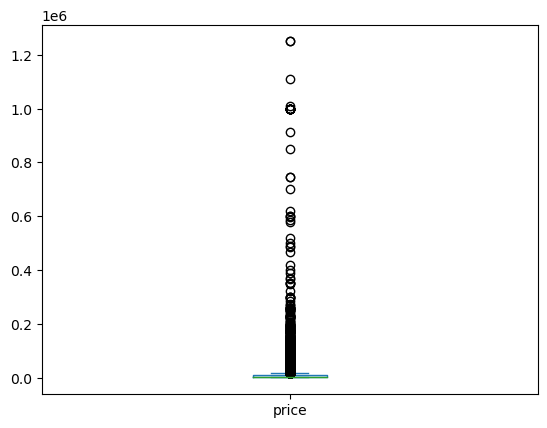

In [40]:
df['price'].plot(kind = 'box')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319915 entries, 2 to 371527
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   dateCrawled          319915 non-null  datetime64[ns]
 1   name                 319915 non-null  object        
 2   seller               319915 non-null  object        
 3   offerType            319915 non-null  object        
 4   price                319915 non-null  int64         
 5   abtest               319915 non-null  object        
 6   vehicleType          319915 non-null  object        
 7   yearOfRegistration   319915 non-null  int16         
 8   gearbox              319915 non-null  object        
 9   powerPS              319915 non-null  int32         
 10  model                319915 non-null  object        
 11  kilometer            319915 non-null  int32         
 12  monthOfRegistration  319915 non-null  int8          
 13  fuelType      

### 2. Can you tell me the Distribution of Vehicles based on Year of Registration with the help of a plot


Text(0, 0.5, 'Number of Vehicles')

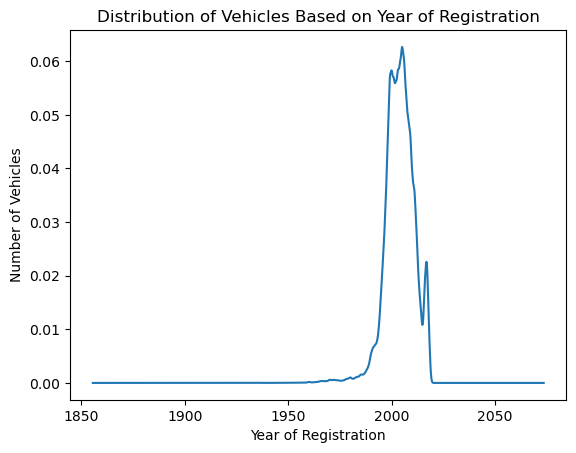

In [50]:
df['yearOfRegistration'].plot(kind = 'kde')
plt.title('Distribution of Vehicles Based on Year of Registration')
plt.xlabel('Year of Registration')
plt.ylabel('Number of Vehicles')

### 3. Create a plot based on the Variation of the price range by the vehicle type


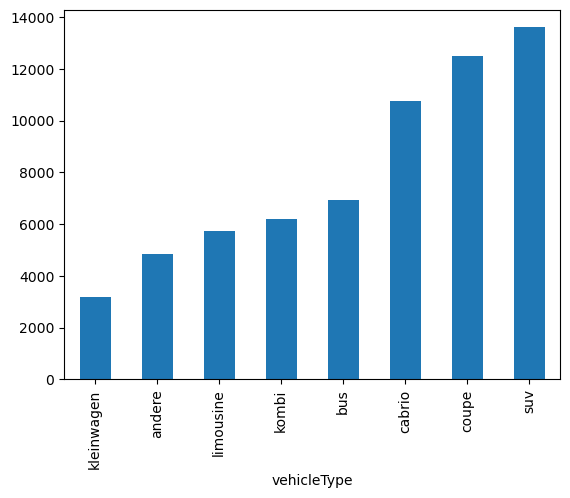

<Figure size 1200x800 with 0 Axes>

In [44]:
df.groupby(by = 'vehicleType')['price'].mean().sort_values().plot(kind = 'bar')
plt.figure(figsize=(12, 8))
plt.show()

### 4.Find out Total count of vehicles by type available on ebay for sale.As well as create a visualization for the client


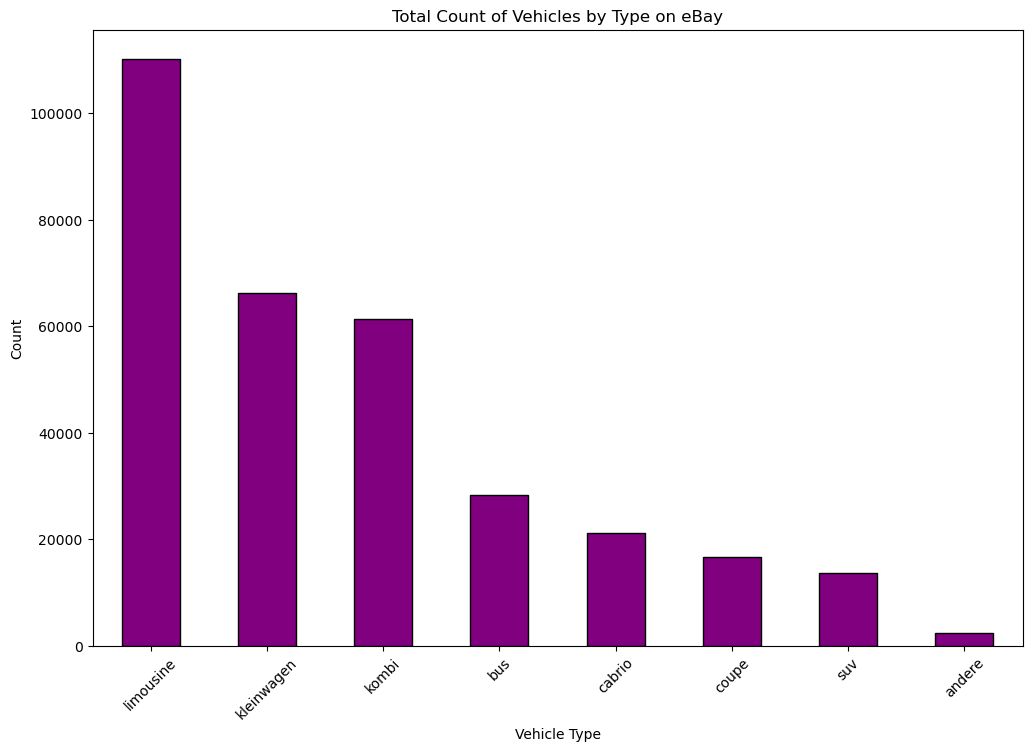

In [45]:
df1 = df['vehicleType'].value_counts()
plt.figure(figsize=(12, 8))
df1.plot(kind='bar', color='purple',edgecolor = 'black')


plt.title('Total Count of Vehicles by Type on eBay')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.show()

### 5.Is there any relationship between dollar_price and kilometer? 

In [46]:
df[['price','kilometer']].corr(method='spearman')

,price,kilometer
price,1.000000,-0.423475
kilometer,-0.423475,1.000000


<Axes: xlabel='price', ylabel='kilometer'>

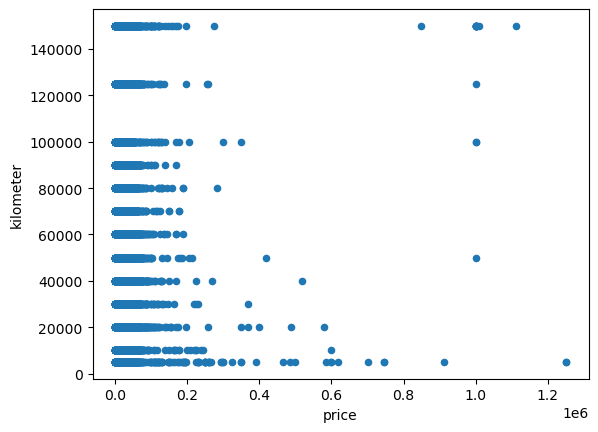

In [47]:
df.plot('price','kilometer',kind='scatter')

In [48]:
df.to_csv("autos_clean.csv")